In [1]:
# uses pyCaret to find optimise model and tune it
# check version
from library.common import Core
core = Core()

from pycaret.utils import version
from pycaret.regression import *
version()

'2.3.5'

In [2]:
# Set up pyCaret Regression
# load dataset
regions_list  = core.list_of_regions
r = 0
cluster = regions_list[r]
print(cluster)
data = core.get_cluster_regression_datas(cluster = cluster, first = 1971, last = 2020)

reg0 = setup(data, target = 'co2', session_id=123, log_experiment=True,
             normalize = True, normalize_method = 'minmax',
             remove_outliers = False, outliers_threshold = 0.05, verbose = False,
             experiment_name='carbon emission Cluster 0')
best_model = compare_models(fold=8, sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,26.1229,963.2332,30.3002,0.9771,0.0330,0.0284,0.7062
br,Bayesian Ridge,26.6201,1061.3254,31.3398,0.9757,0.0334,0.0286,0.0062
huber,Huber Regressor,32.3106,2075.5526,39.9825,0.9585,0.0412,0.0338,0.0162
lasso,Lasso Regression,42.0568,2631.4005,47.4623,0.9403,0.0537,0.0467,0.0062
llar,Lasso Least Angle Regression,48.3824,3299.9724,54.0507,0.9303,0.0609,0.0544,0.0075
omp,Orthogonal Matching Pursuit,54.4180,4823.8860,68.7597,0.8844,0.0819,0.0636,0.0050
rf,Random Forest Regressor,39.6190,6400.4017,58.7410,0.8971,0.0569,0.0384,0.0875
et,Extra Trees Regressor,37.7404,7499.2175,58.6222,0.8910,0.0555,0.0352,0.0700
gbr,Gradient Boosting Regressor,41.9150,8780.8303,63.5644,0.8681,0.0603,0.0390,0.0238
knn,K Neighbors Regressor,57.4282,9326.8117,81.4984,0.8471,0.0828,0.0589,0.0062


In [3]:
model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,33.7030,1864.3982,43.1787,0.9798,0.0382,0.0329
1,9.9211,208.0193,14.4229,0.9875,0.0173,0.0118
2,26.3273,834.9075,28.8948,0.9937,0.0324,0.0303
3,29.7338,895.6074,29.9267,0.9871,0.0378,0.0373
4,22.8501,776.4898,27.8656,0.9824,0.0256,0.0217
5,22.3255,708.4194,26.6161,0.9800,0.0229,0.0197
6,24.9088,844.1651,29.0545,0.9652,0.0349,0.0289
7,19.2503,602.7762,24.5515,0.9872,0.0298,0.0216
8,27.3876,938.3877,30.6331,0.8871,0.0279,0.0259
9,25.2286,781.9402,27.9632,0.9923,0.0375,0.0314


In [4]:
tuned_model = tune_model(model, n_iter=50, optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,33.7030,1864.3982,43.1787,0.9798,0.0382,0.0329
1,9.9211,208.0193,14.4229,0.9875,0.0173,0.0118
2,26.3273,834.9075,28.8948,0.9937,0.0324,0.0303
3,29.7338,895.6074,29.9267,0.9871,0.0378,0.0373
4,22.8501,776.4898,27.8656,0.9824,0.0256,0.0217
5,22.3255,708.4194,26.6161,0.9800,0.0229,0.0197
6,24.9088,844.1651,29.0545,0.9652,0.0349,0.0289
7,19.2503,602.7762,24.5515,0.9872,0.0298,0.0216
8,27.3876,938.3877,30.6331,0.8871,0.0279,0.0259
9,25.2286,781.9402,27.9632,0.9923,0.0375,0.0314


In [5]:
tuned_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

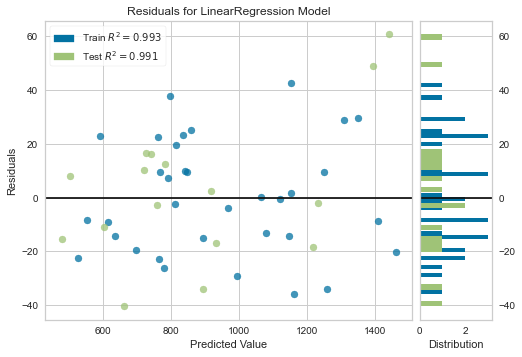

In [6]:
plot_model(tuned_model)

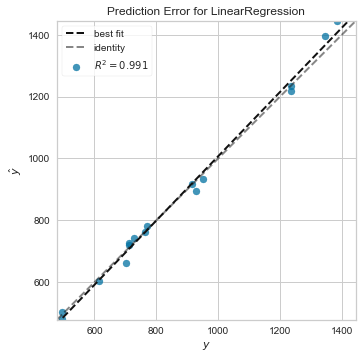

In [7]:

plot_model(tuned_model, plot = 'error')

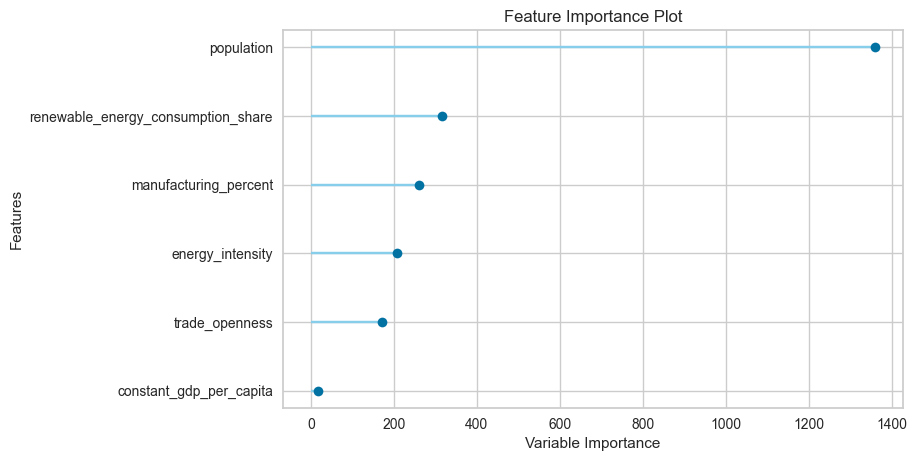

In [8]:

plot_model(tuned_model, plot = 'feature')

In [9]:

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [10]:
# interpret_model(tuned_model)


In [11]:
# interpret_model(tuned_model, plot = 'correlation')

In [12]:
# interpret_model(tuned_model, plot = 'reason', observation = 12)

In [17]:
# Code to read the forecast
from pathlib import Path
import pickle
cwd = Path.cwd()
fc_path = cwd.parent/r'data/processed/ts_forecast.pkl'
with open(fc_path, 'rb') as fc_file:
    read_fc = pickle.load(fc_file)

    print(read_fc)

NameError: name 'i' is not defined

In [18]:
for i in range(len(read_fc)):
    print(i)
    print(read_fc[i])

0
['Cluster 0', 'trade_openness', array([[2021.        , 4399.42991989],
       [2022.        , 4399.42991989],
       [2023.        , 4399.42991989],
       [2024.        , 4399.42991989],
       [2025.        , 4399.42991989]])]
1
['Cluster 2', 'manufacturing_percent', array([[2021.        , 1035.57626875],
       [2022.        , 1027.38277684],
       [2023.        , 1019.18928492],
       [2024.        , 1010.99579301],
       [2025.        , 1002.80230109]])]
2
['Cluster 2', 'co2', array([[ 2021.        , 16736.47064652],
       [ 2022.        , 16643.82962381],
       [ 2023.        , 16578.09211072],
       [ 2024.        , 16516.86187941],
       [ 2025.        , 16456.38677594]])]
3
['Global', 'population', array([[2.02100000e+03, 7.83405760e+09],
       [2.02200000e+03, 7.91361755e+09],
       [2.02300000e+03, 7.99317749e+09],
       [2.02400000e+03, 8.07273744e+09],
       [2.02500000e+03, 8.15229738e+09]])]
4
['Cluster 0', 'constant_gdp_per_capita', array([[  2021.        ,

In [22]:
fc = pd.DataFrame(read_fc, columns = ['cluster', 'feature', 'forecast']
                  )

In [24]:
fc.loc[fc.cluster == 'Cluster 1']

,cluster,feature,forecast
9,Cluster 1,constant_gdp_per_capita,"[[2021.0, 69808.9317809508], [2022.0, 70676.84..."
11,Cluster 1,co2,"[[2021.0, 15584.938375296897], [2022.0, 15757...."
12,Cluster 1,renewable_energy_consumption_share,"[[2021.0, 19.12396332849057], [2022.0, 19.7277..."
13,Cluster 1,manufacturing_percent,"[[2021.0, 37.0277829065315], [2022.0, 37.02778..."
15,Cluster 1,energy_intensity,"[[2021.0, 0.33660707478106044], [2022.0, 0.331..."
18,Cluster 1,population,"[[2021.0, 1737147293.0], [2022.0, 1742698463.0..."
27,Cluster 1,trade_openness,"[[2021.0, 58.72092822676846], [2022.0, 59.5403..."
